## Predicting Prevelance of Influenza-like Illness From Tweets
<br>
By: Alma Niu, Haruto Nakai, and Jonathan Pak
<br>
Group 8
<br>
March 16, 2018

In [1]:
import pandas as pd
data = 'retrivedTexts2.csv'
tweet = pd.read_table(data, sep=',')

In [2]:
tweet.head(9)

,tweet_id,text,related
0,6004550306,WHO warns of bird flu resurgence\n: http://tin...,0
1,6003455112,"Nov 23, Cold Remedies; Getting Ready for the C...",0
2,6002109706,RT @letsrollforums: The War on You and Your Ch...,0
3,5999019609,@kelliepickler Chinese years: 2007-Cow: Mad Co...,1
4,5990798305,Getting ready to go get my Swine Flu Vaccine,0
5,4636047505,Canadian studies says people getting the seaso...,0
6,5989718714,this flu season is a horrible. everyone is get...,1
7,5989668305,Swine Flu vs. Bird Flu vs. Zombie Flu http://b...,0
8,5989190910,RT @cherylp59: @orionbooks review : The Things...,0


In [3]:
tweet.shape

(4816, 3)

In [4]:
#Summary Statistics: Percentage of related tweets 

#tweet['length']=tweet['text'].map(lambda text:len(text)) #get corresponding text length

non_related=tweet[tweet['related']==0].count()/tweet.count()   #2200 nonrelated, #2616 related
related=tweet[tweet['related']==1].count()/tweet.count()
print("Related Sick",related[0]) # about 54 % of tweets in this data is sick related
print("Non-Related",non_related[0]) #about 45% tweets in this data non related




('Related Sick', 0.5431893687707641)
('Non-Related', 0.4568106312292359)


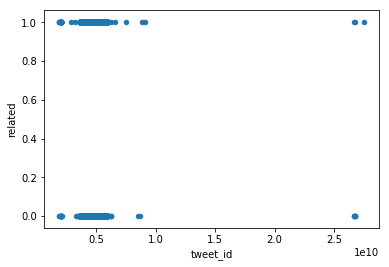

In [5]:
#Show Scatter plot of TweetIds and their Class 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tweet.plot.scatter(x='tweet_id',y='related')

In [6]:
#setting X and Y
X = tweet.text
Y = tweet.related

In [7]:
print X
print Y

0       WHO warns of bird flu resurgence\n: http://tin...
1       Nov 23, Cold Remedies; Getting Ready for the C...
2       RT @letsrollforums: The War on You and Your Ch...
3       @kelliepickler Chinese years: 2007-Cow: Mad Co...
4            Getting ready to go get my Swine Flu Vaccine
5       Canadian studies says people getting the seaso...
6       this flu season is a horrible. everyone is get...
7       Swine Flu vs. Bird Flu vs. Zombie Flu http://b...
8       RT @cherylp59: @orionbooks review : The Things...
9                @OhSoNattral swine flu!  Ppl are scared.
10      Congressional Libs: only thing that can save u...
11      Duane Reade canceled their flu shot clinics! N...
12      Gucci Mane - Uptown Bird Flu.\nhttp://www.medi...
13      Fear of Flu: Shifting the Goalposts http://cli...
14      Oh yay! Getting chippy food for dinner. I'm ge...
15      Just returned from the Doctors. They clearly w...
16      @billmaher response 2 swine flu captures curre...
17      Kellog

In [8]:
#splitting the data using cross validation. It split the data so the train would have 3612 tweets
# while the test data will consist of 1204 tweets.
from sklearn.cross_validation import train_test_split
X_tweet, X_test, y_tweet, y_test = train_test_split(X, Y, random_state=1)
print X_tweet.shape
print X_test.shape
print(y_tweet.shape)
print(y_test.shape)


(3612,)
(1204,)
(3612,)
(1204,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#Fitting the data while using stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
vect.fit(X_tweet)
X_tweet_dtm = vect.transform(X_tweet)
X_test_dtm = vect.transform(X_test)

### Naive Bayes Model

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_tweet_dtm, y_tweet)
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class) 

0.7483388704318937


### Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_tweet_dtm, y_tweet)
y_pred_class = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
metrics.accuracy_score(y_test, y_pred_class)

0.7416943521594684

In [12]:
#first time ran with only retriviedData 2 resulted in an accuracy of 75-76%
#When adding in data from retrivedData 3 the accuracy lowered to 72-74%
#When adding stop words, logestic regressions went about by 2% to 74% while Naive Bayes whent about about .5% to about 74.5%

### Searching Using Common Keywords

In [13]:
#keyword = flu
flu = 'fluTweets1.csv'
flu_tweet = pd.read_table(flu, sep=',')
flu_tweet.head()
flu_dtm = vect.transform(flu_tweet.text)

y_pred_class1 = nb.predict(flu_dtm)
from sklearn import metrics
float(y_pred_class1.sum())/len(y_pred_class1)


0.7035830618892508

In [14]:
#keyword = sick
flu = 'fluTweets2.csv'
flu_tweet2 = pd.read_table(flu, sep=',')
flu_tweet2.head()
flu_dtm2 = vect.transform(flu_tweet2.text)

y_pred_class2 = nb.predict(flu_dtm2)
float(y_pred_class2.sum())/len(y_pred_class2)

0.9408409042890344

In [15]:
#keyword = cold
flu = 'fluTweets3.csv'
flu_tweet3 = pd.read_table(flu, sep=',')
flu_tweet3.head()
flu_dtm3 = vect.transform(flu_tweet3.text)

y_pred_class3 = nb.predict(flu_dtm3)
float(y_pred_class3.sum())/len(y_pred_class3)

0.9194768035969753

In [16]:
#keyword = cough
flu = 'fluTweets4.csv'
flu_tweet4 = pd.read_table(flu, sep=',')
flu_tweet4.head()
flu_dtm4 = vect.transform(flu_tweet4.text)

y_pred_class4 = nb.predict(flu_dtm4)
float(y_pred_class4.sum())/len(y_pred_class4)

0.9304897314375987

In [17]:
#keyword =  fever
flu = 'fluTweets5.csv'
flu_tweet5 = pd.read_table(flu, sep=',')
flu_tweet5.head()
flu_dtm5 = vect.transform(flu_tweet5.text)

y_pred_class5 = nb.predict(flu_dtm5)
float(y_pred_class5.sum())/len(y_pred_class5)

0.9443507588532883

In [18]:
#keyword = virus
flu = 'fluTweets6.csv'
flu_tweet6 = pd.read_table(flu, sep=',')
flu_tweet6.head()
flu_dtm6 = vect.transform(flu_tweet6.text)

y_pred_class6 = nb.predict(flu_dtm6)
float(y_pred_class6.sum())/len(y_pred_class6)

0.4583333333333333

### Demo

In [ ]:
#"I am so sick with the influenza flu virus"
#"Coffee makes me energtic!"
#"this flu season is a horrible. everyone is getting sick. makes you dislike winter that much more. winter is not fun when one has a cold."
#"RT @McFaul: This is sick.  Remember, Kiselev works for Putin. https://t.co/tdCDBABhAz"
#   Expected Output: [1 0 1 0]

In [ ]:
#test example -made up cases ourselves --this is where I started to add things--
case=["I am so sick with the influenza flu virus","Coffee makes me energtic!",
"this flu season is a horrible. everyone is getting sick. makes you dislike winter that much more. winter is not fun when one has a cold.",      
"RT @McFaul: This is sick.  Remember, Kiselev works for Putin. https://t.co/tdCDBABhAz"] #create random test case
example_case=vect.transform(case)
predict=nb.predict(example_case)
print(predict) #Ouput: 1 for sick tweet, 0 for nonsick

In [ ]:
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
#false positives
X_test[y_test < y_pred_class]

In [ ]:
#false negatives
X_test[y_test > y_pred_class]

In [ ]:
#Lets determine the value of certain words in the text! Use bag of words method.

#Formula:(# times $w$ appears in comment) * log(# comments in train data/# of comments with word)

def TFIDF(comment,train):
    comment=comment.split(' ') #split comment into list of words
    tfidf_comment=np.zeros(len(comment)) #initiliaze tfidf array for comment
    num_comment_word=0 #initialize number of comments containing word
    word_index=0 #initialize index for word in comment
    
    for word in comment:
        tf=comment.count(word) #count frequency of word in comment
        for text in train["text"]: 
            if text.split(' ').count(word)>0: #count number of comments with word
                   num_comment_word+=1
        
        idf=np.log(train.count()[0]/num_comment_word)
        
        tfidf_comment[word_index]=tf*idf
        num_comment_word=0
        word_index+=1
        
    return tfidf_comment
        
        
                    
                  
common=TFIDF("sick cold cough fever virus influenza",tweet) #lower number: more common in our text   

rare=TFIDF("sun eat math gym",tweet)

print("More common words\n",common)


print("Rare words\n", rare)
#Result: notice how rare words have higher TFIDF, or higher value for being unique

#Using the common sick words we found, we tell our twitter API to grab tweets with that word

### Five-Fold Cross Validation

In [ ]:
# get cross validation score for Naive Bayes, if score close, then good accuracy
from sklearn.model_selection import cross_val_score

vect2=CountVectorizer()
vect2.fit(X)#fit the texts
total_X=vect2.transform(X)
nb.fit(total_X,Y) #use naive bayes to train data

scores=cross_val_score(nb,total_X,Y,cv=5)#got it, split into several test/train of 5 groups
print(scores) #if scores do not vary much, then good evaluation


In [ ]:
#get cross validation score for Logistic Regression
logreg.fit(total_X, Y)
score2=cross_val_score(logreg,total_X,Y,cv=5)
print(score2)

In [ ]:
#compare Naive vs Logistic Regression with Bar Graph
import numpy as np
import matplotlib.pyplot as plt
n_groups=5
s1=tuple(scores) #change array scores to tuples
s2=tuple(score2)
fig,ax=plt.subplots()
index=np.arange(n_groups)
bar_width=0.35
opacity=0.8
rects1=plt.bar(index,s1,bar_width,alpha=opacity,color='b',label='Naive')
rects2=plt.bar(index+bar_width,s2,bar_width,alpha=opacity,color='g',label='Logistic')

plt.xlabel('Score Runs')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison')
plt.xticks(index+bar_width,('1','2','3','4','5'))
plt.legend()
plt.tight_layout()
plt.show() #overall,Naive Bayes outperforms Logistic Regression

In [ ]:
print("Accuracy of NB Cross Validation:%0.2f(+/-%0.2f)"%(scores.mean(),scores.std()*2))

In [ ]:

print("Accuracy of LR Cross Validation:%0.2f(+/-%0.2f)"%(score2.mean(),score2.std()*2))

In [ ]:
#Precision, Recall, Fscore for Naive Bayes
    #Recall: correctly identified sick tweets/all sick tweets from test data
    #Precision:correctly identified sick tweets/all predicted sick tweets from train data
    #Fscore: weighted harmonic mean between Precision/Recall

print(y_pred_class)  #from Naive Bayes predicted result

y_test=np.array(y_test) #actual test from train_split method



from sklearn.metrics import recall_score,precision_score



recall=recall_score(y_test,y_pred_class,average=None) #return array of scores for each class, get sick
precision=precision_score(y_test,y_pred_class,average=None)
print("Recall",recall[1])
print("Precision",precision[1])

F_Score=2*(precision[1]*recall[1])/(precision[1]+recall[1])
print("F_Score",F_Score)